# Comparison of Q result with Fenton's Fourier.exe

use waterwaves.py code

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from waterwaves import unpack,IEj,wave

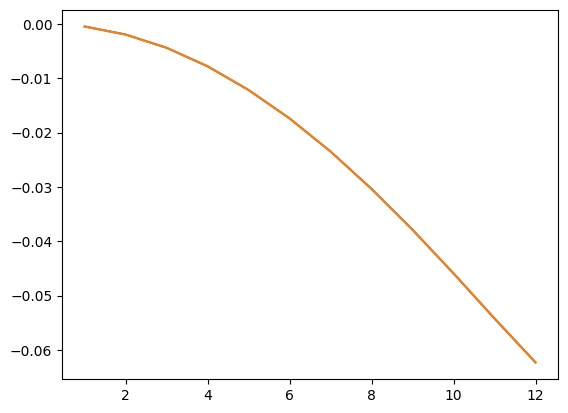

In [2]:
def Fenton_Q(n): # Read Fenton result n
    with open(f"deep/{n:02d}.txt","rt") as fenton:
        comp=fenton.read()
    
    comp=comp.split('\n')
    
    targets=['d','H','c','Q','R','q','r']
    data={}
    jBE=[]
    for line in comp:
        if line:
            for target in targets:
                if f'({target})' in line:
                    data[target]=float(line.split('\t')[1]) #use first column of table in fenton file (L=2pi)
            if '0'<=line[1]<='9':
                jBE+=[line.split('\t')]
            
    data['Ub']=data.pop('c') # Ub is wave speed in my code
    if not 'd' in data:
        data['d']=0 # deep water
    J,B,E=np.array(jBE).T
    return -data['q']

def Cooke_Q(n):
    N=20
    H=0.02*n*np.pi
    sol=wave(N,H,scaler=0.75*H)
    Ej,Bj,Ub,Q,R=unpack(sol.x)
    return Q

n_rng=np.arange(1,13)
Fenton=np.array([Fenton_Q(n) for n in n_rng])
Cooke=np.array([Cooke_Q(n) for n in n_rng])
plt.plot(n_rng,Cooke)
plt.plot(n_rng,Fenton)

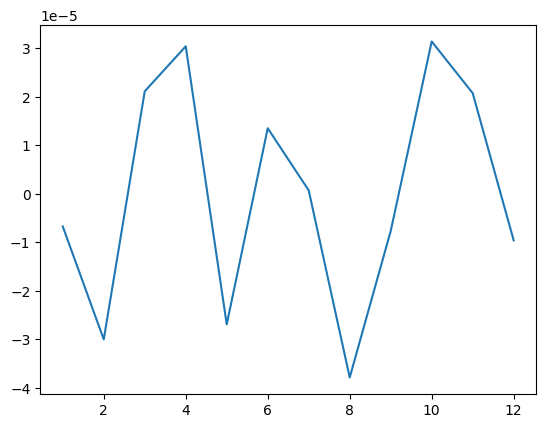

In [3]:
plt.plot(n_rng,Fenton-Cooke)